## Observations and Insights 

1. Bar Graphs indicate that drug regimen Capomullin tested maximum mice count and Naftisol tested lowest number of mice. 

2. There is a positive correlation between mouse weight and the average tumor volume and is 0.84. This may contribute to the effectiveness of treatment in future. 

3. One potential outlier within Infubinol drug regimen.

4. Number of male mice were more than female mice for the study.


In [356]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [357]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [358]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [359]:
# Combine the data into a single dataset- 
#merge the `mouse_metadata` and `study_results` DataFrames into a single DataFrame

combined_data=pd.merge(mouse_metadata,study_results, how="left", on = "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [360]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())


249

In [361]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [362]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouse_id = combined_data.loc[combined_data["Mouse ID"] == "g989"]
all_duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [363]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [364]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())


248

## Summary Statistics

In [365]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
#the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean = clean_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = clean_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.

summary_statistics_df = pd.DataFrame({"Mean of Tumor Volume":mean,
                              "Median of Tumor Volume":median,
                              "Variance of Tumor Volume":variance,
                              "Std Dev of Tumor Volume":standard_deviation,
                              "SEM of Tumor Volume":sem})
summary_statistics_df




,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [366]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df=clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_statistics_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


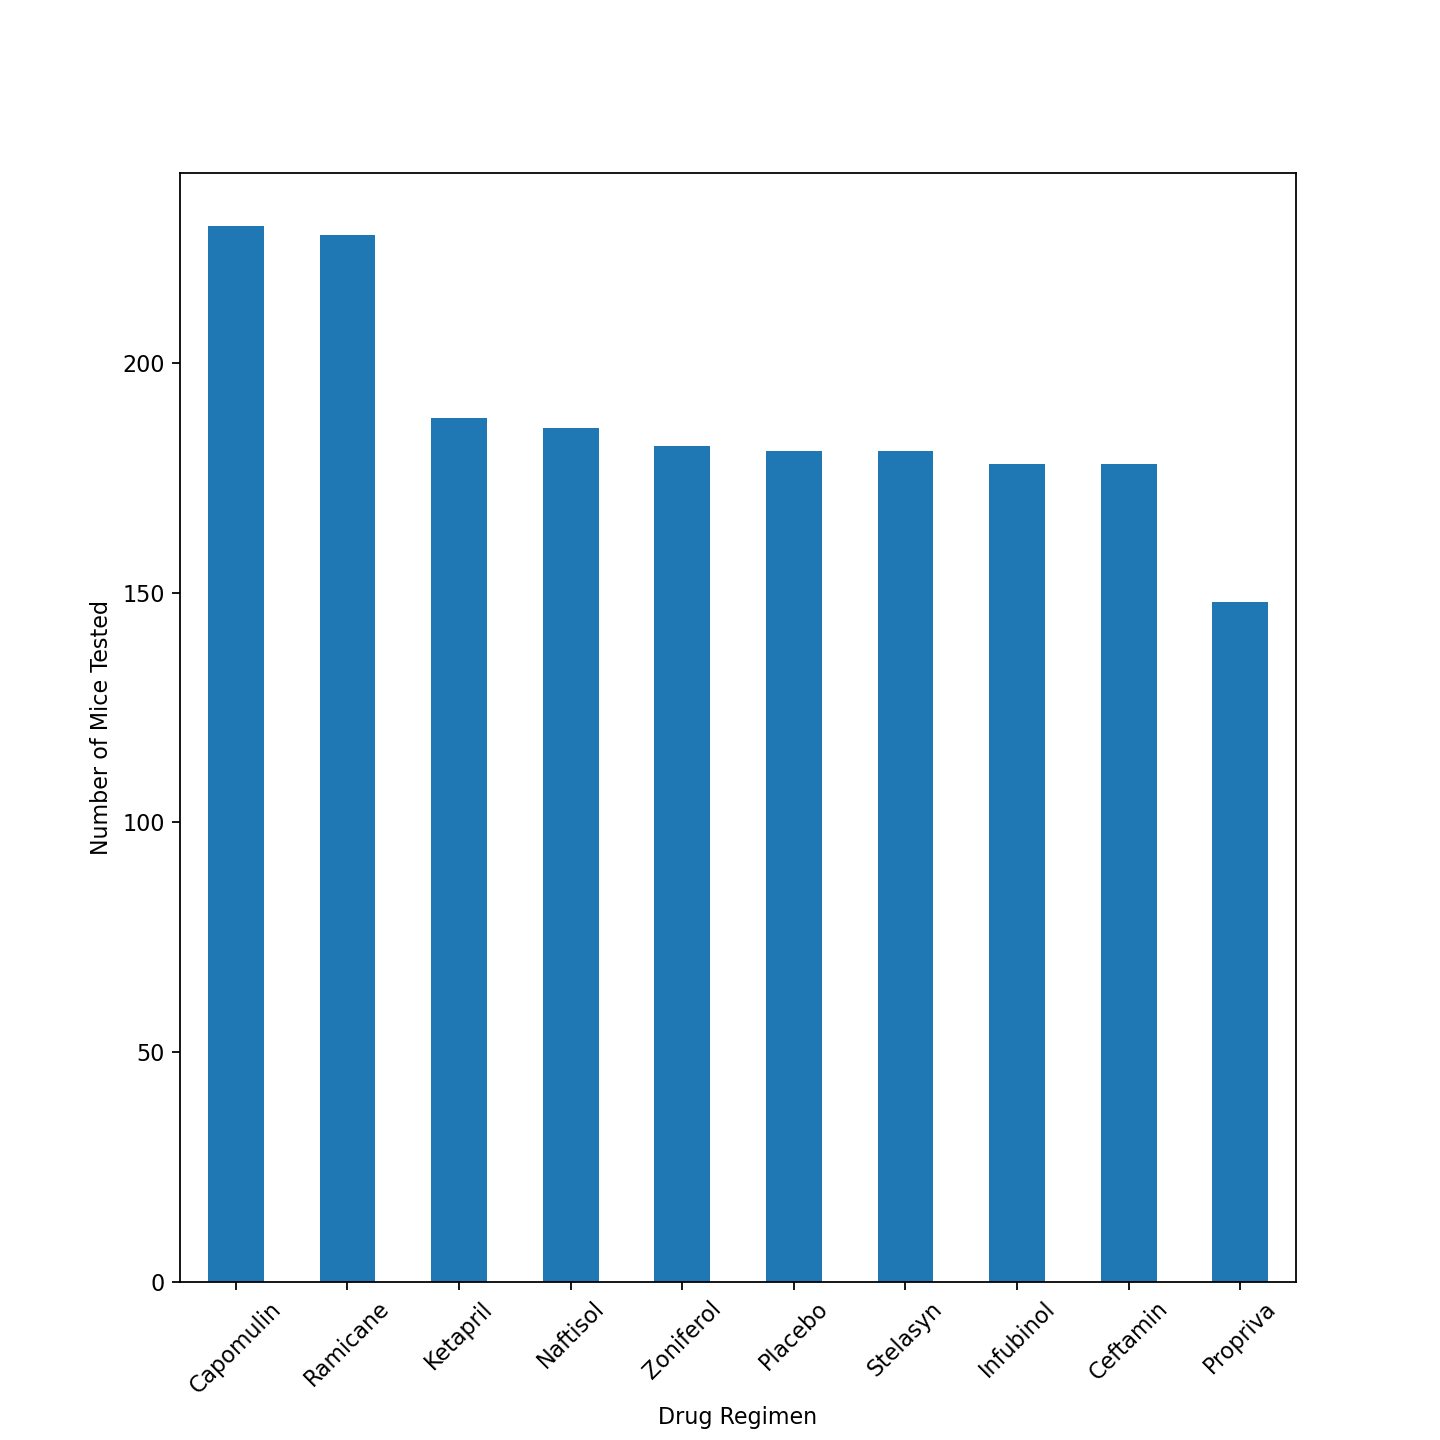

In [367]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#`DataFrame.plot()` method.

plt.figure(figsize=(9,9))

counts = clean_data_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Mice Tested")
plt.show()



<IPython.core.display.Javascript object>


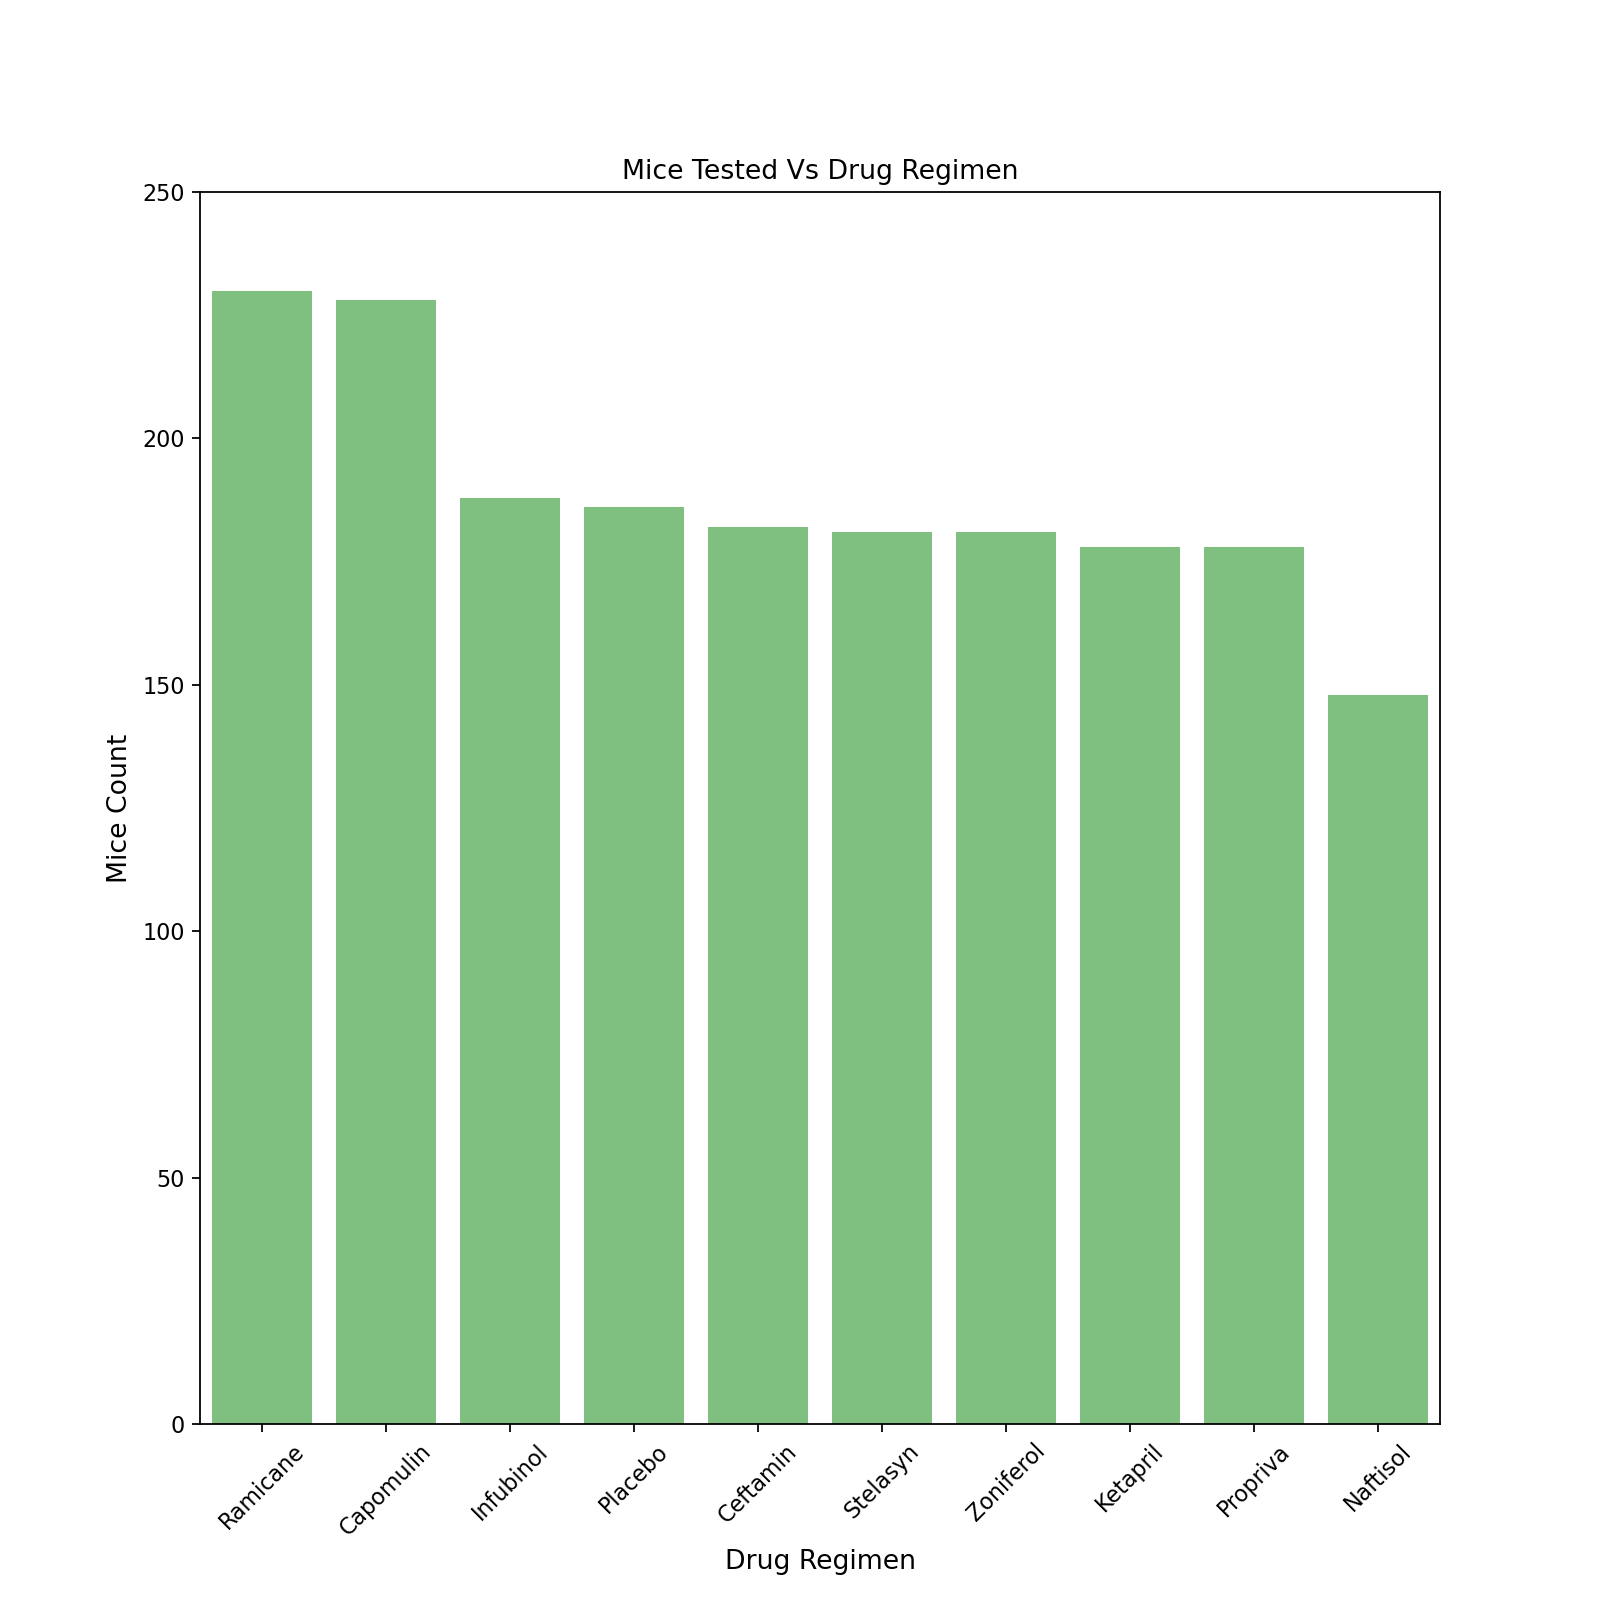

In [377]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using 
#pyplot.

#mice count per drug regimen
plt.figure(figsize=(10,10))
mice_count=clean_data_df["Drug Regimen"].value_counts()
mice_count

x_axis=np.arange(len(mice_count))
plt.bar(x_axis,mice_count,color='g', align='center',alpha=0.5)

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,[
'Ramicane','Capomulin','Infubinol','Placebo','Ceftamin','Stelasyn','Zoniferol','Ketapril','Propriva','Naftisol'
],fontsize = 10)
plt.xlim(-0.5,len(x_axis)-0.50)
plt.ylim(0,max(mice_count)+20)
plt.xticks(rotation=45)
plt.title("Mice Tested Vs Drug Regimen")
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Mice Count",fontsize = 12)
plt.show()

<IPython.core.display.Javascript object>


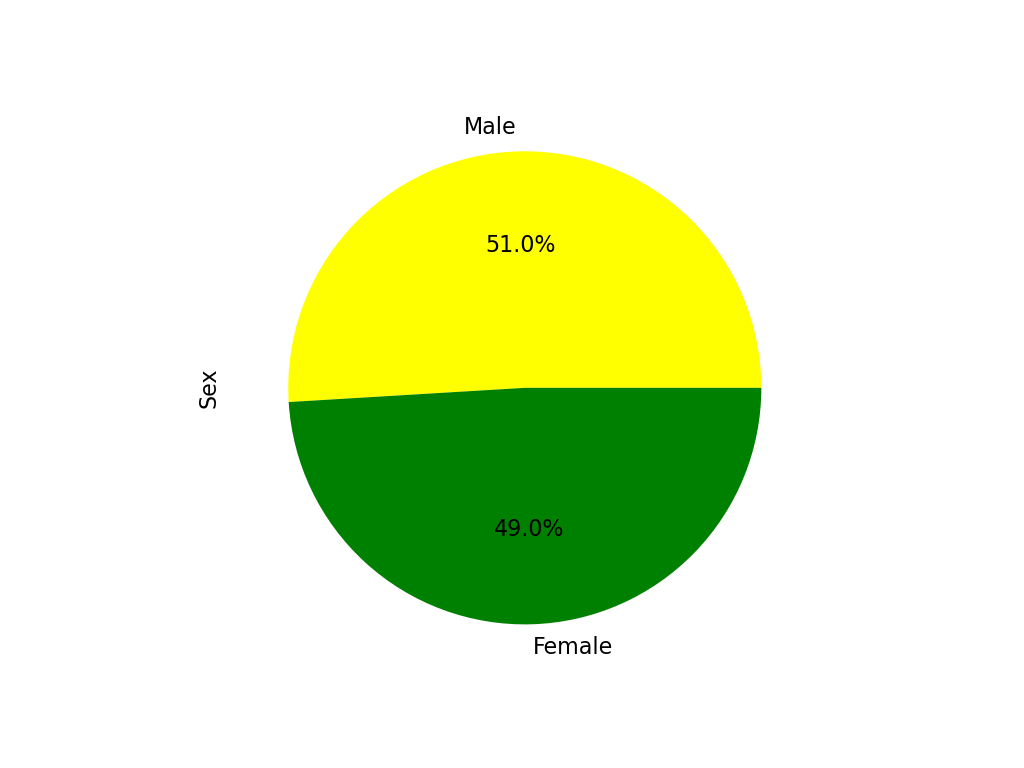

In [378]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts = clean_data_df.Sex.value_counts()
colors=["yellow","green"]
counts.plot(kind="pie",autopct='%1.1f%%',colors=colors)
plt.show()

<IPython.core.display.Javascript object>


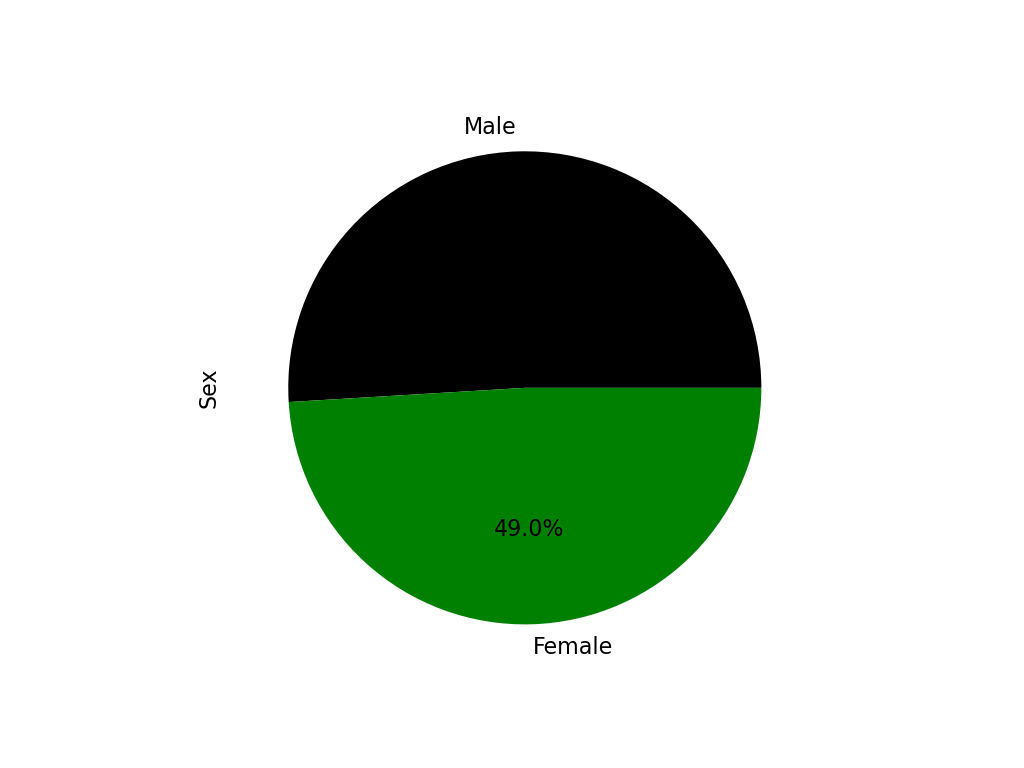

In [379]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = clean_data_df.Sex.value_counts()
colors=["black","green"]
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%',colors=colors)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [381]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor_df = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor_df = max_tumor_df.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data = max_tumor_df.merge(clean_data_df,on=['Mouse ID','Timepoint'],how="left")


In [382]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


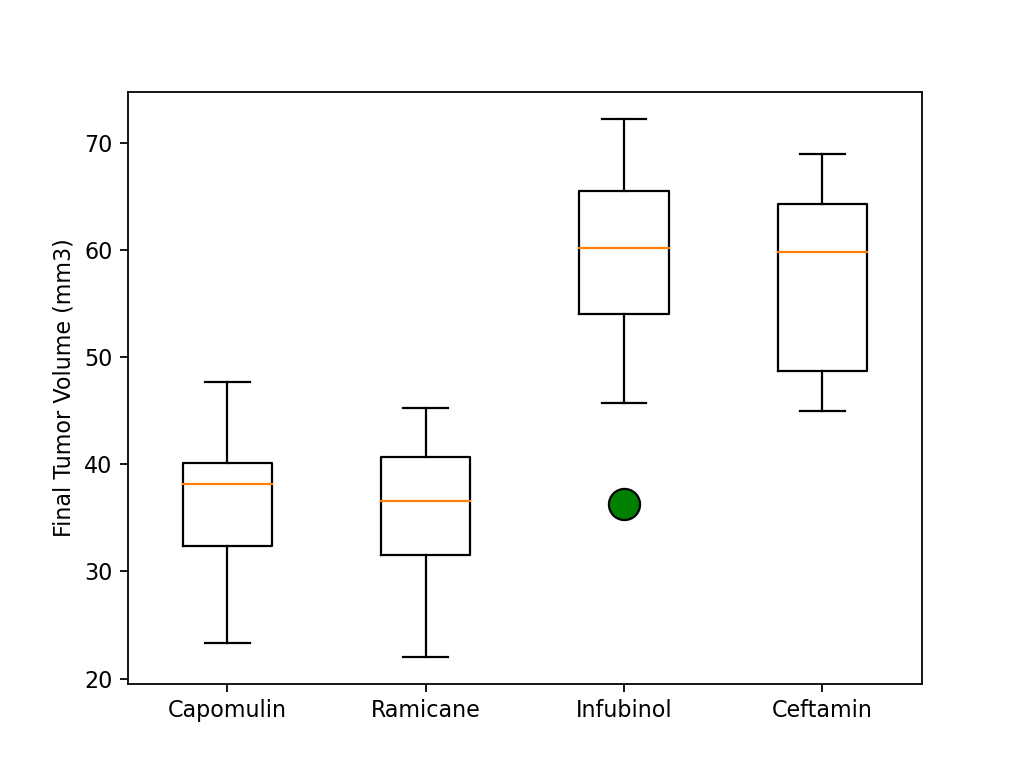

In [383]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='green',markersize=14)
plt.boxplot(tumor_vol_data, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


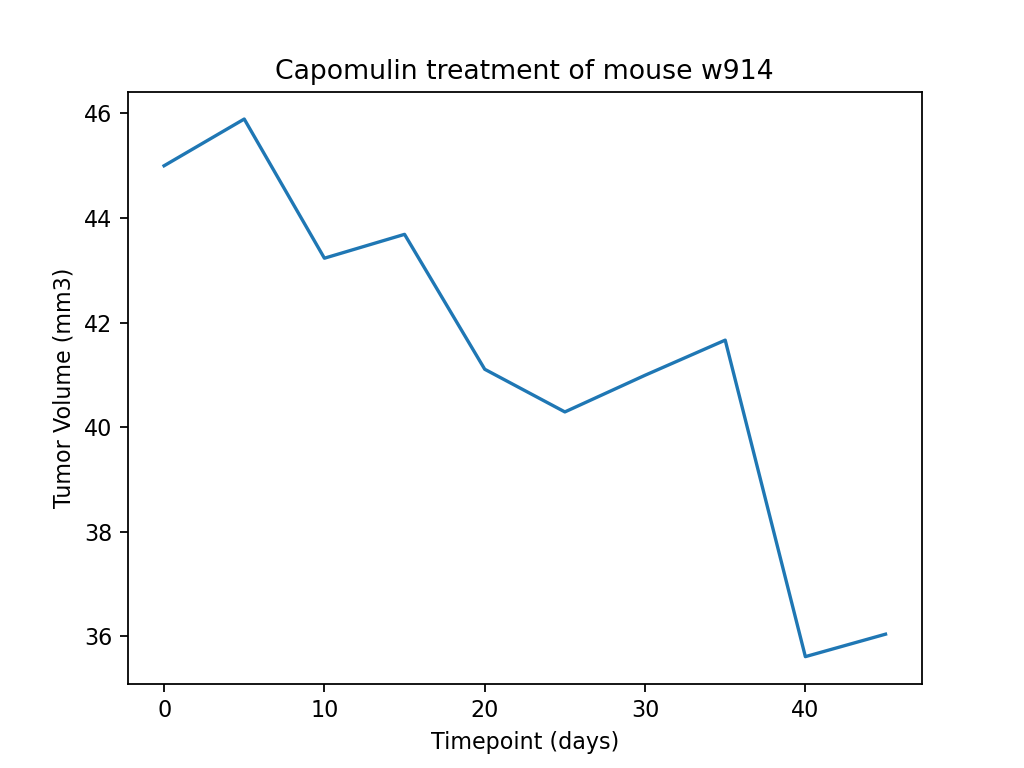

In [384]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_df.loc[capomulin_df['Mouse ID']== 'w914']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse w914')
plt.show()


<IPython.core.display.Javascript object>


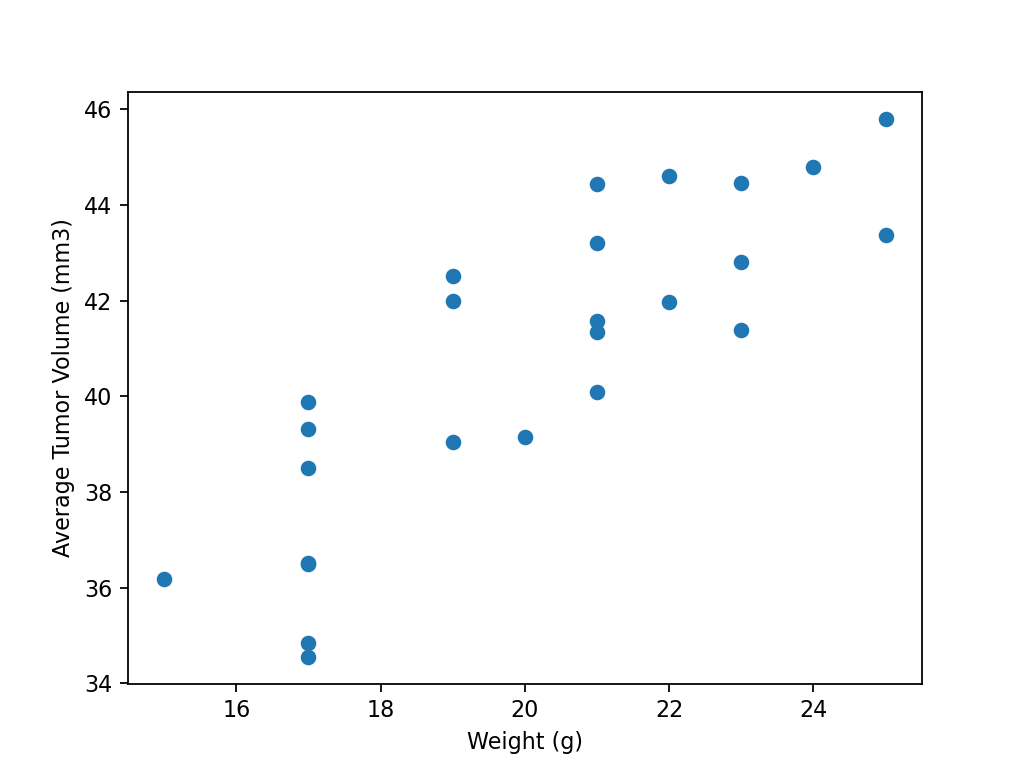

In [385]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


<IPython.core.display.Javascript object>


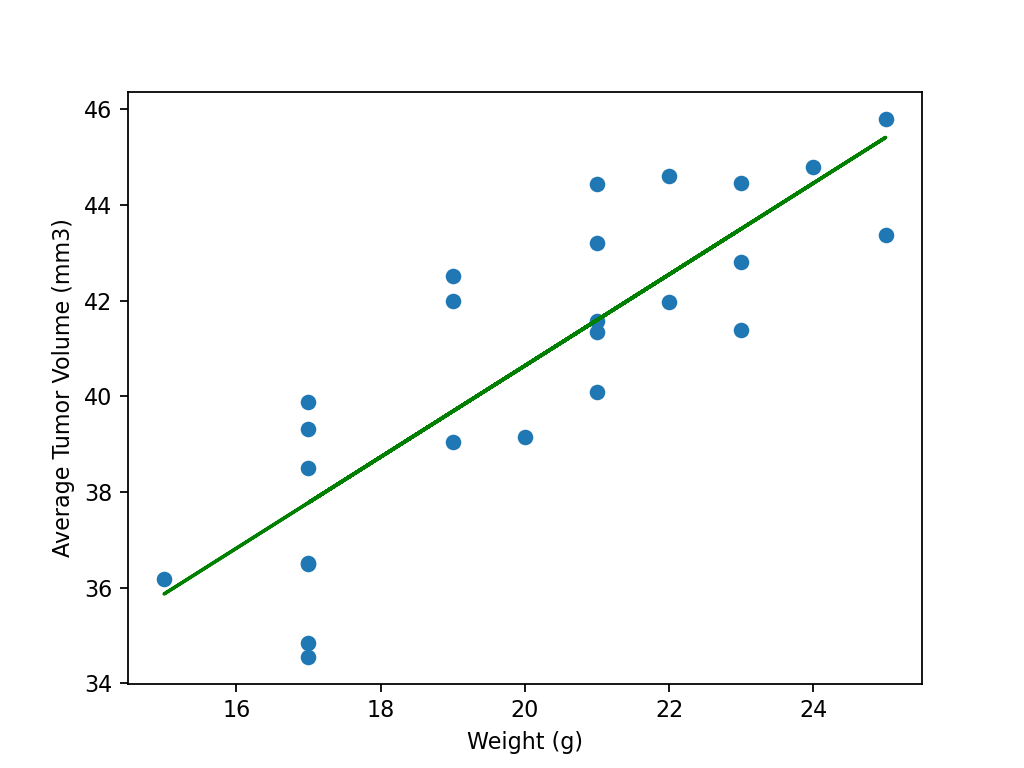

In [386]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

y_values = capomulin_avg['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="green")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()